# Red Wine Quality Prediction Project


In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

1.there are 1500 rows and 12 columns in dataframe.
2.input data is in float(continuous) dtype.
3.output which is quality is in integer(discrete) form.

# EDA

In [165]:
df.shape

(1599, 12)

In [166]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [167]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [168]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [170]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

1.there is huge difference between 75% and max value in 'total sulfur dioxide' 
and 'free sulfur dioxide' that means there is outliers are present in that column.

2.minimum wine quality is 3 and maximum is 8.

3.Mean ane Median(50%):see the diff between mean and meadian value, 
    if mean>median then perticular column is skewd.
    we can see the column 'total sulfur dioxide' and difference betweeen mean and meadian is high. 

In [171]:
df.quality.value_counts()
# 3 number quality values are 10 only


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

1.most of wines are having quality of 5 and 6
2.there is an class imbalance in target feature

In [172]:
df.duplicated().sum()


240

1.There are 240 duplicate records are present in dataset.
2.we need to drop duplicate records.

In [173]:
df.drop_duplicates(inplace=True)

In [174]:
df.shape

(1359, 12)

# Univariate Analysis

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


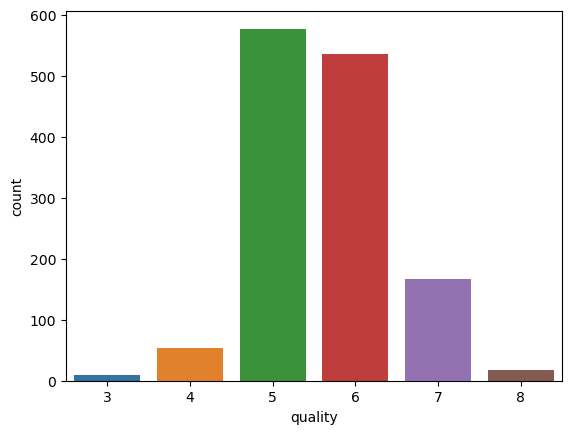

In [175]:
a = sns.countplot(x = 'quality',data=df) 
print(df['quality'].value_counts())

1.We can see a class-imbalance in target feature.
2.most of wines are having quality of 5 or 6.
3.there are only 10 records having quality 3.

<AxesSubplot:ylabel='fixed acidity'>

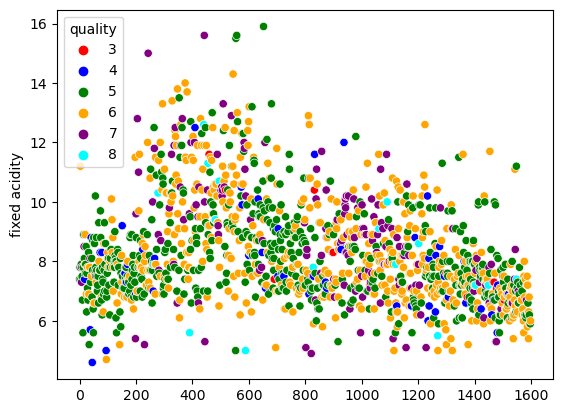

In [176]:
color = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
sns.scatterplot(x =df.index,y=df['fixed acidity'],hue =df['quality'],palette=color)

1.'x' parameter is set to df.index, which means x-axis will use the dataframe index values.
2.'y' parameter is set to 'fixed acidity' represent y-axis.
3.This plot indicate that there is no strong linear correlation between 'fixed acidity' and 'quality'.


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


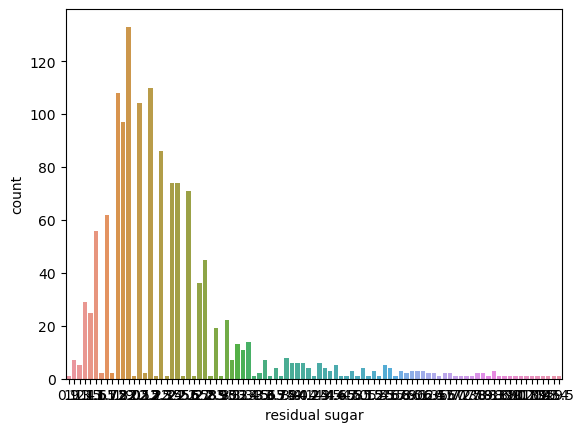

In [177]:
a = sns.countplot(x ='residual sugar',data=df)
print(df['residual sugar'].value_counts())
plt.show()

In [178]:
# checking Numerical
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num col:',num_col)

num col: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# Distribution plot

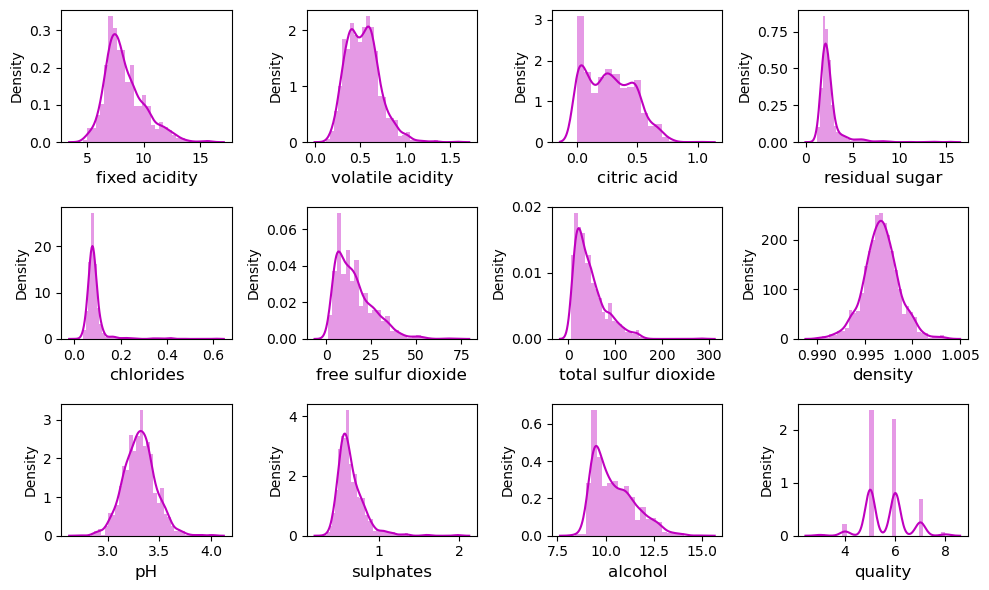

In [179]:
# distribution plot
plt.figure(figsize = (10,6),facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)#2 rows, 4 columns
        sns.distplot(df[col],color ='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

1.we can see data in 'residual sugar','chlorides','sulphate','total sulphurdioxide' skewed to right.
2.these columns are skewed because of presence of outliers.
3.we need to remove skewness by using any transformation techniques

# Bivariate Analysis

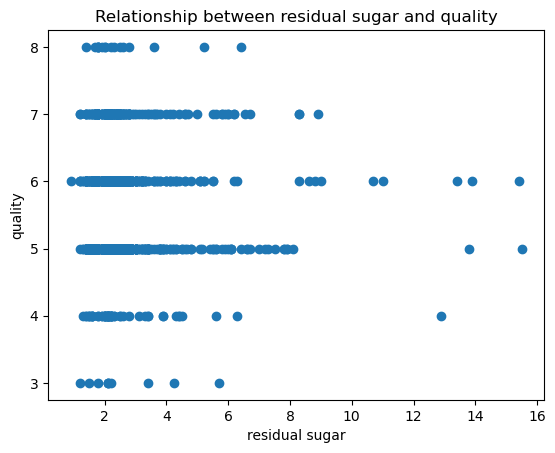

In [180]:

plt.title('Relationship between residual sugar and quality')
plt.scatter(x='residual sugar', y='quality', data = df)
plt.xlabel('residual sugar')
plt.ylabel('quality')
plt.show()

1. it shows that 5 nd 6 number of quality highly correlate with residual sugar.


# Boxplot

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

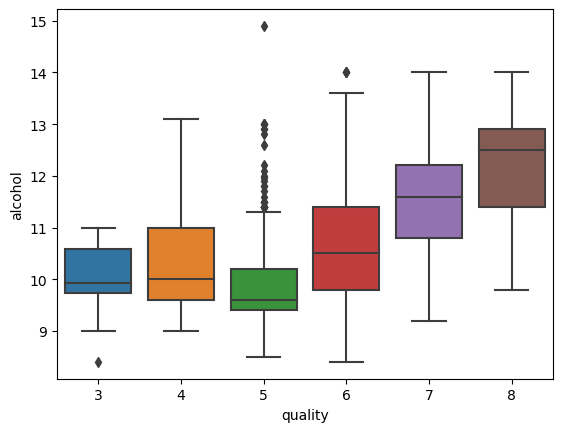

In [181]:
sns.boxplot(x=df['quality'],y=df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

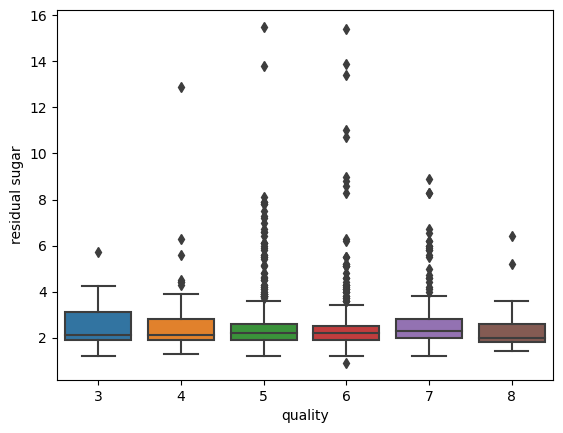

In [182]:
sns.boxplot(x=df['quality'],y=df['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

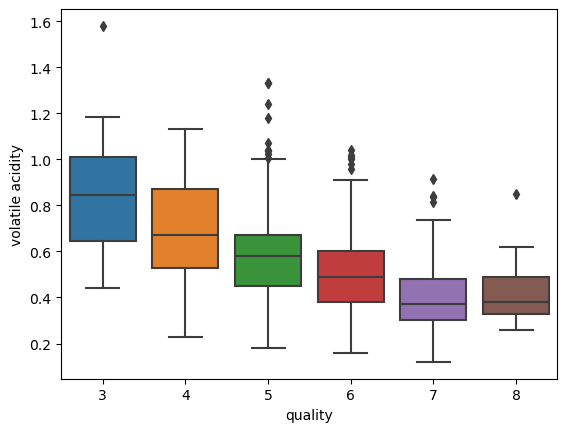

In [183]:
sns.boxplot(x=df['quality'],y=df['volatile acidity'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

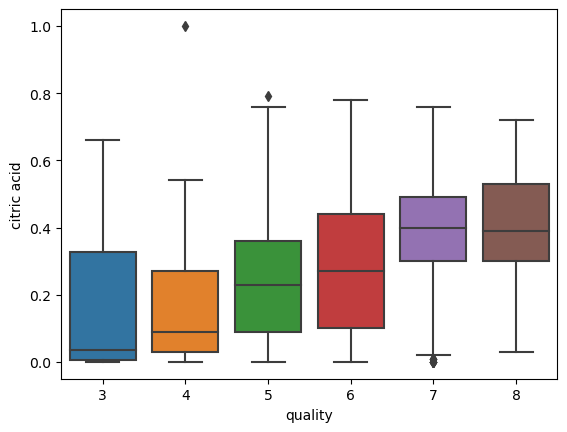

In [184]:
sns.boxplot(x=df['quality'],y=df['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

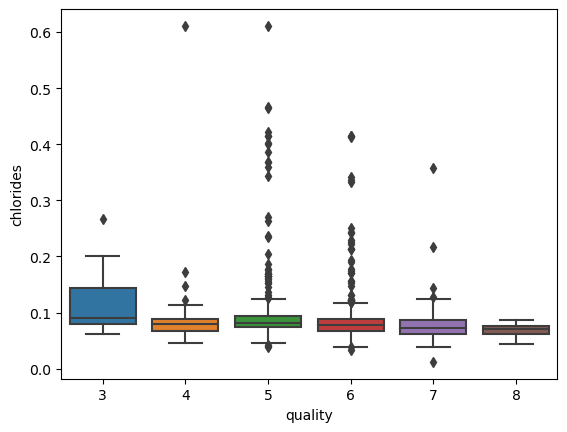

In [185]:
sns.boxplot(x=df['quality'],y=df['chlorides'])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

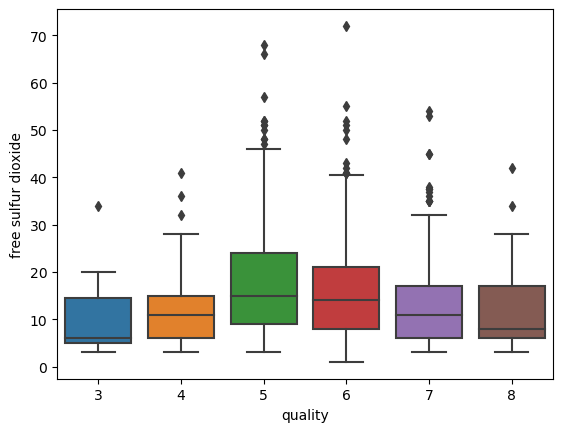

In [186]:
sns.boxplot(x=df['quality'],y=df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

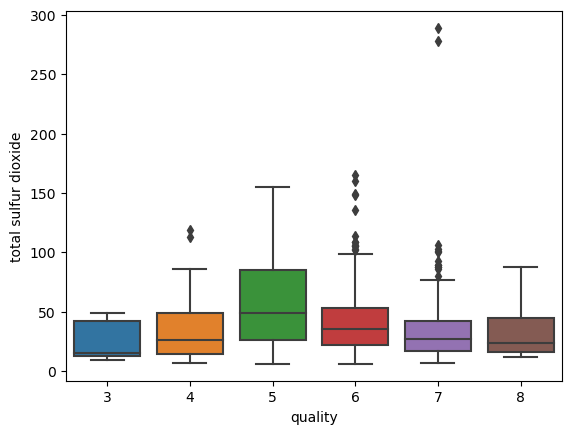

In [187]:
sns.boxplot(x=df['quality'],y=df['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='density'>

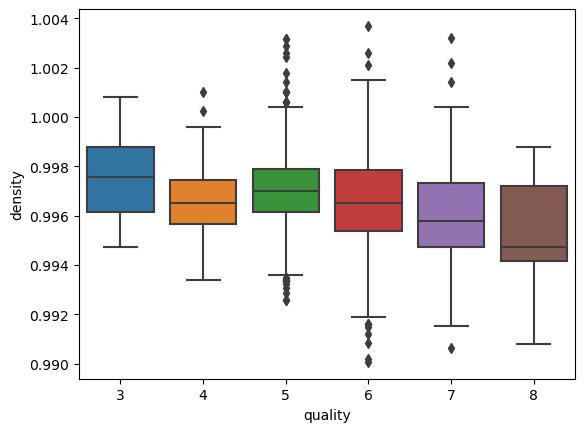

In [188]:
sns.boxplot(x=df['quality'],y=df['density'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

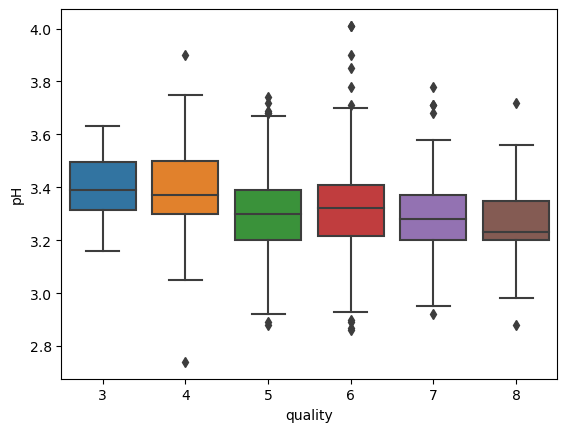

In [189]:
sns.boxplot(x=df['quality'],y=df['pH'])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

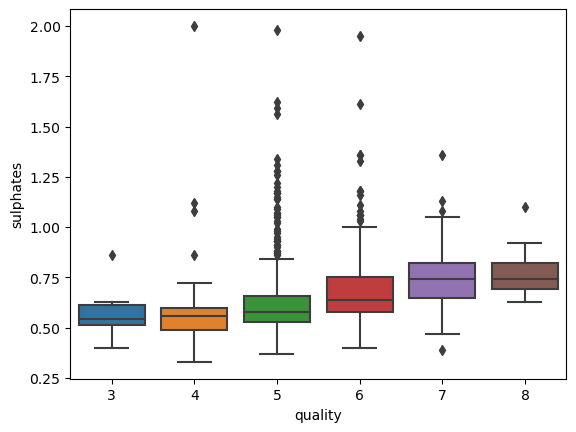

In [190]:
sns.boxplot(x=df['quality'],y=df['sulphates'])

# Multivariate Analysis

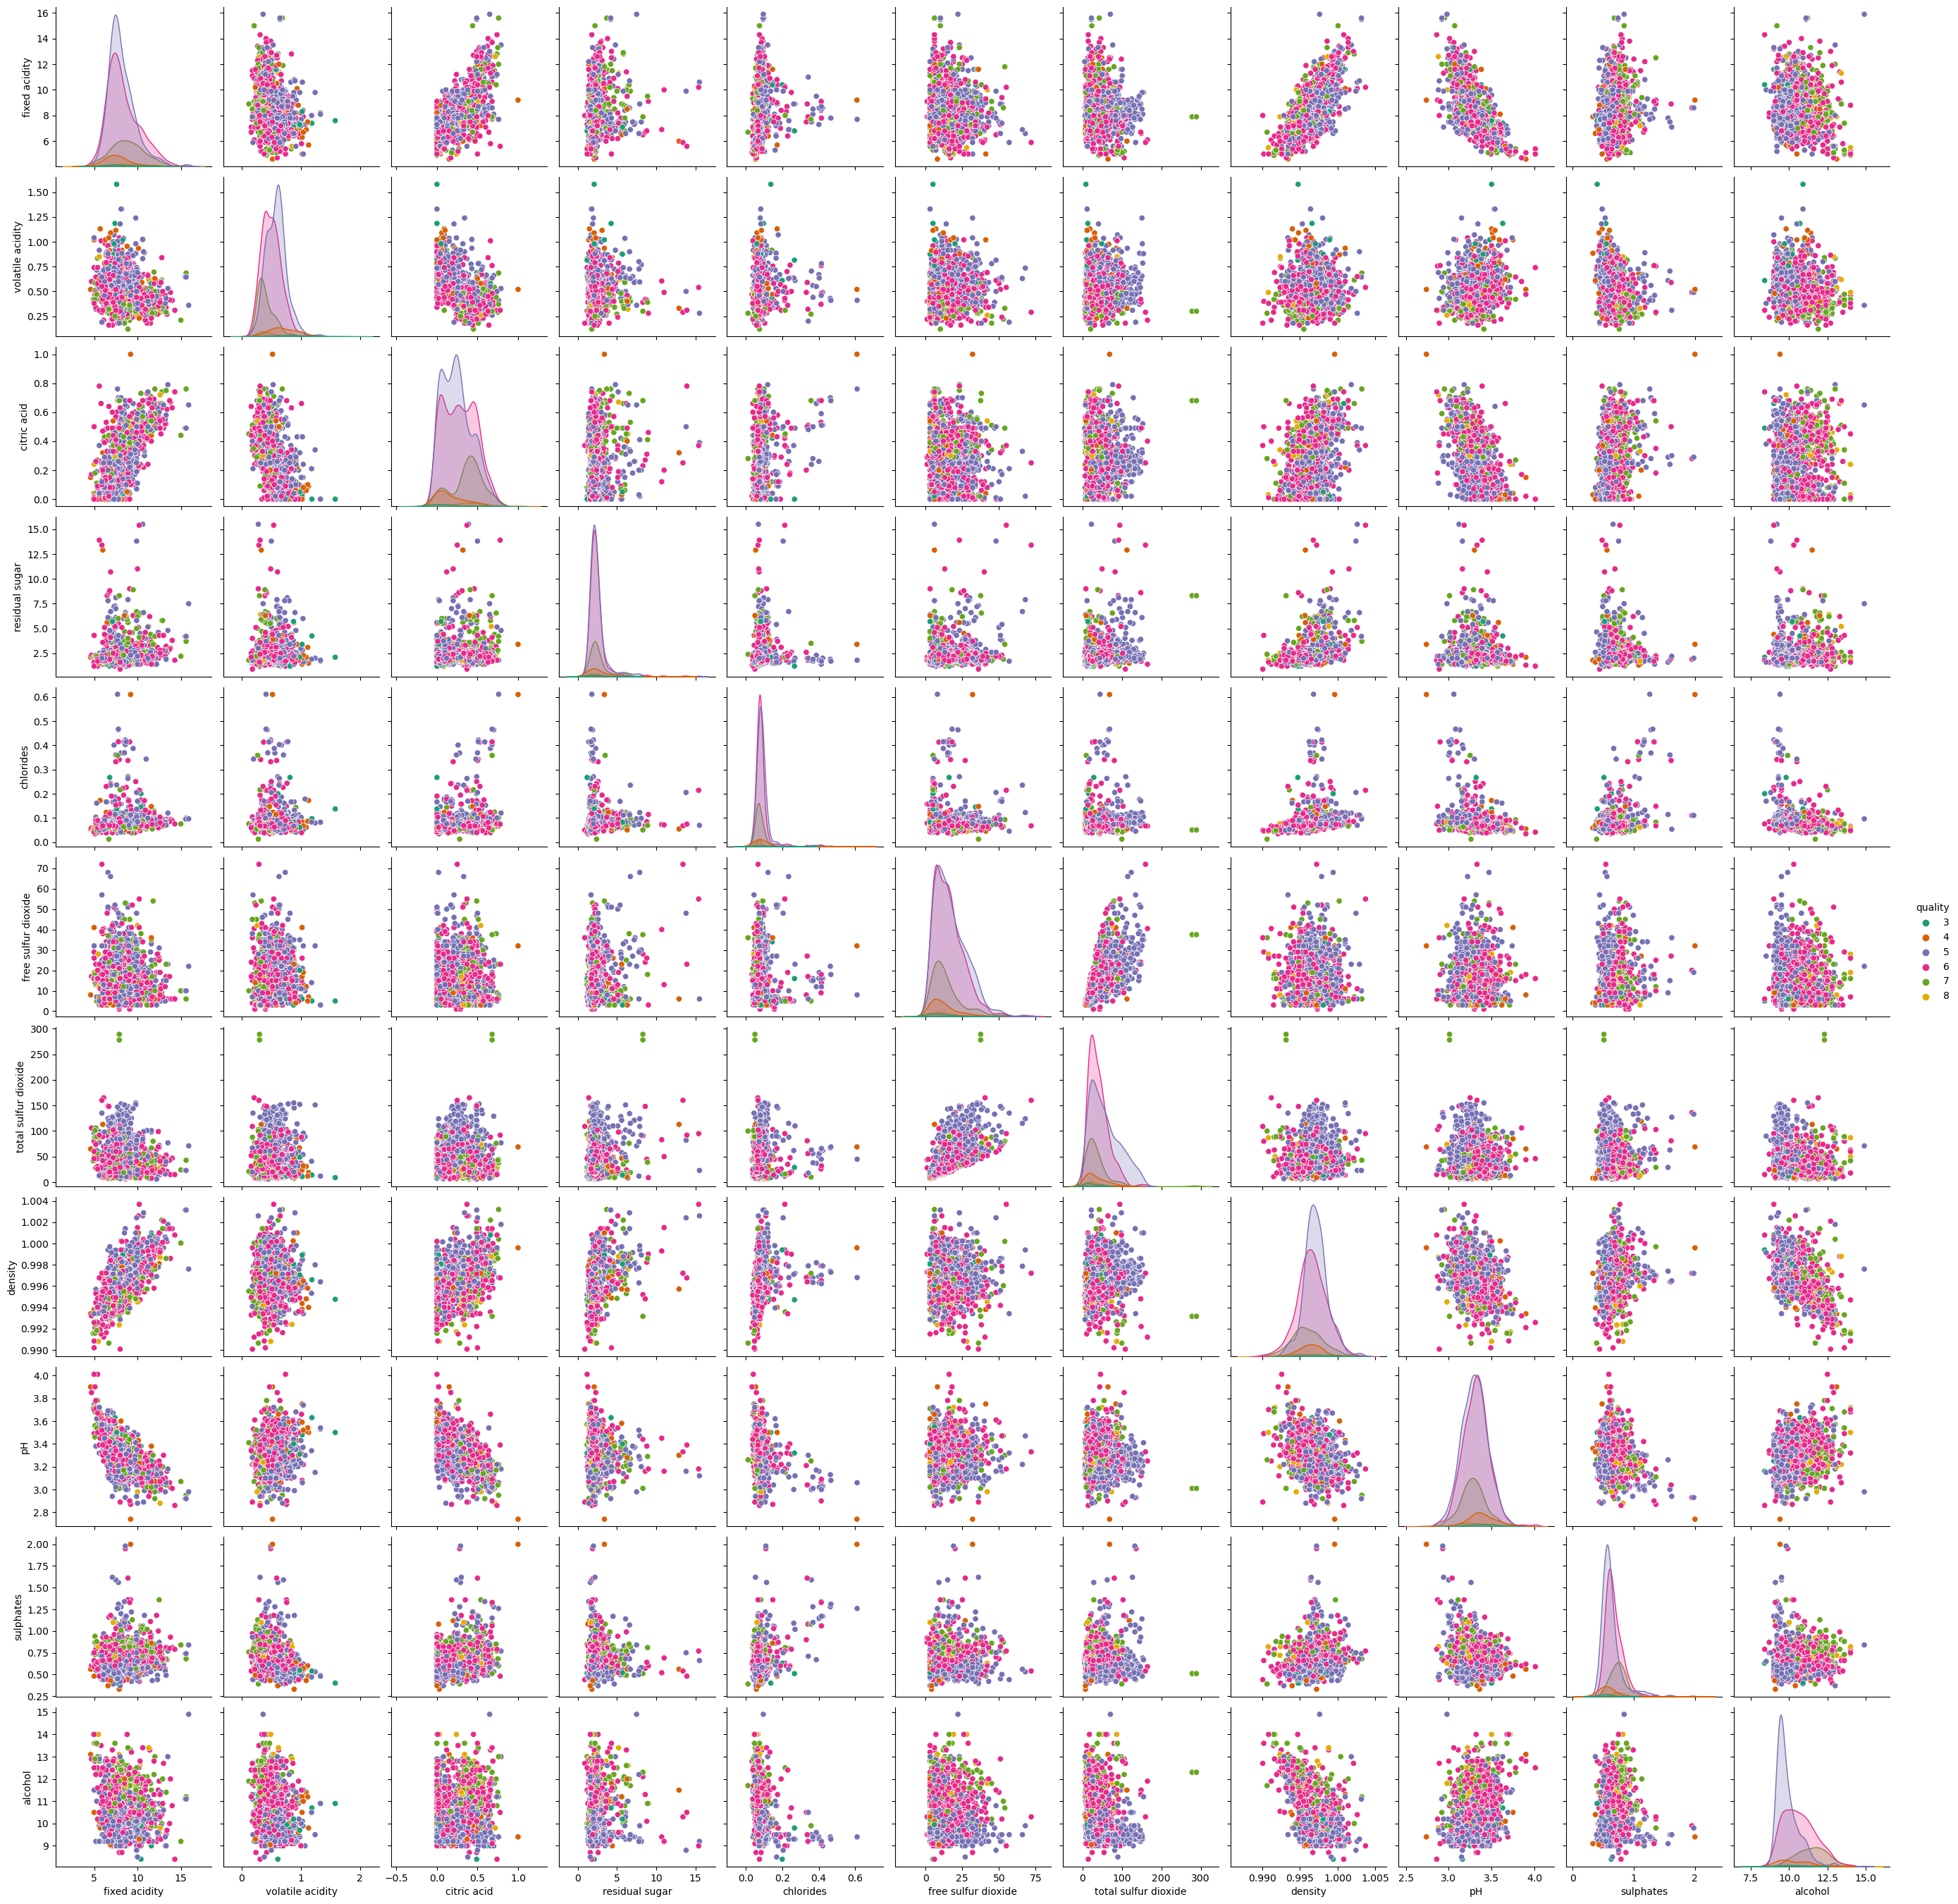

In [191]:
sns.pairplot(df,hue = 'quality',palette = 'Dark2')
plt.show()

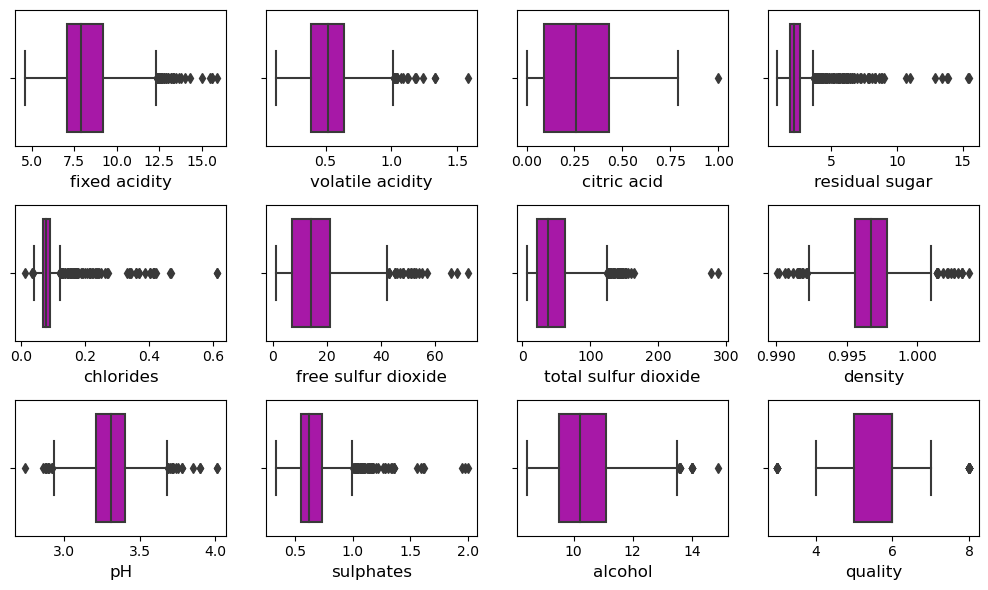

In [192]:
# distribution plot
plt.figure(figsize = (10,6),facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)#2 rows, 4 columns
        sns.boxplot(df[col],color ='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber+=1
plt.tight_layout()

In [193]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

# Remove Skewness

In [194]:
df['fixed acidity']      = np.cbrt(df['fixed acidity'])
df['volatile acidity']   = np.cbrt(df['volatile acidity'])
df['residual sugar']     = np.cbrt(df['residual sugar'])
df['chlorides']          = np.cbrt(df['chlorides'])
df['free sulfur dioxide'] = np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])
df['density']             = np.cbrt(df['density'])
df['pH']                  = np.cbrt(df['pH'])
df['sulphates']           = np.cbrt(df['sulphates'])
df['alcohol']           = np.cbrt(df['alcohol'])

In [195]:
df.skew()

fixed acidity           0.544081
volatile acidity        0.009339
citric acid             0.312726
residual sugar          2.493356
chlorides               3.068605
free sulfur dioxide     0.246380
total sulfur dioxide    0.392816
density                 0.039485
pH                      0.103196
sulphates               1.350862
alcohol                 0.726630
quality                 0.192407
dtype: float64

Here we can see the skewness is removed.

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [197]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        2.016300          0.798282     0.272333        1.336514   
std         0.136139          0.093145     0.195537        0.174993   
min         1.663103          0.493242     0.000000        0.965489   
25%         1.921997          0.730614     0.090000        1.238562   
50%         1.991632          0.804145     0.260000        1.300591   
75%         2.095379          0.861774     0.430000        1.375069   
max         2.514581          1.164713     1.000000        2.493315   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.437135             2.398313              3.419014     0.998901   
std       0.055690             0.535372              0.805722     0.000624   
min       0.228943             1.000000              1.817121     0.996679   
25%       0.412129             1.912931              2.802039     0.998531   
50%       0.429084             2.410142              3.361975     0.998899   
75%       0.449794             2.758924              3.979057     0.999273   
max       0.848556             4.160168              6.611489     1.001228   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      1.489914     0.864716     2.182535     5.623252  
std       0.023228     0.067232     0.073776     0.823578  
min       1.399319     0.691042     2.032793     3.000000  
25%       1.475146     0.819321     2.117912     5.000000  
50%       1.490308     0.852702     2.168703     6.000000  
75%       1.503695     0.900411     2.230699     6.000000  
max       1.588723     1.259921     2.460719     8.000000

this method describe the count,mean,std,min,IQR,and max values of all columns

# Correlation between target variable and independent variable

In [198]:
cor = df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.263593     0.664886   
volatile acidity          -0.263593          1.000000    -0.567246   
citric acid                0.664886         -0.567246     1.000000   
residual sugar             0.153463          0.021027     0.164629   
chlorides                  0.155031          0.103896     0.196778   
free sulfur dioxide       -0.157489          0.002349    -0.063937   
total sulfur dioxide      -0.107437          0.086774     0.023051   
density                    0.676509          0.039203     0.357845   
pH                        -0.703817          0.238950    -0.552064   
sulphates                  0.203066         -0.284063     0.340203   
alcohol                   -0.083833         -0.216995     0.104382   
quality                    0.112390         -0.396736     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.153463   0.155031            -0.157489   
volatile acidity            0.021027   0.103896             0.002349   
citric acid                 0.164629   0.196778            -0.063937   
residual sugar              1.000000   0.068641             0.105947   
chlorides                   0.068641   1.000000            -0.007465   
free sulfur dioxide         0.105947  -0.007465             1.000000   
total sulfur dioxide        0.165009   0.071659             0.758733   
density                     0.374635   0.293368            -0.028446   
pH                         -0.090905  -0.292631             0.074221   
sulphates                  -0.000778   0.305189             0.055512   
alcohol                     0.085810  -0.285037            -0.090598   
quality                     0.019372  -0.165767            -0.049072   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.107437  0.676509 -0.703817   0.203066   
volatile acidity                  0.086774  0.039203  0.238950  -0.284063   
citric acid                       0.023051  0.357845 -0.552064   0.340203   
residual sugar                    0.165009  0.374635 -0.090905  -0.000778   
chlorides                         0.071659  0.293368 -0.292631   0.305189   
free sulfur dioxide               0.758733 -0.028446  0.074221   0.055512   
total sulfur dioxide              1.000000  0.101037 -0.046224   0.038964   
density                           0.101037  1.000000 -0.354874   0.156150   
pH                               -0.046224 -0.354874  1.000000  -0.192685   
sulphates                         0.038964  0.156150 -0.192685   1.000000   
alcohol                          -0.243846 -0.501938  0.210965   0.122936   
quality                          -0.174637 -0.184413 -0.055166   0.291668   

                       alcohol   quality  
fixed acidity        -0.083833  0.112390  
volatile acidity     -0.216995 -0.396736  
citric acid           0.104382  0.228057  
residual sugar        0.085810  0.019372  
chlorides            -0.285037 -0.165767  
free sulfur dioxide  -0.090598 -0.049072  
total sulfur dioxide -0.243846 -0.174637  
density              -0.501938 -0.184413  
pH                    0.210965 -0.055166  
sulphates             0.122936  0.291668  
alcohol               1.000000  0.481308  
quality               0.481308  1.000000

This gives the correlation between the dependent and independant variable.


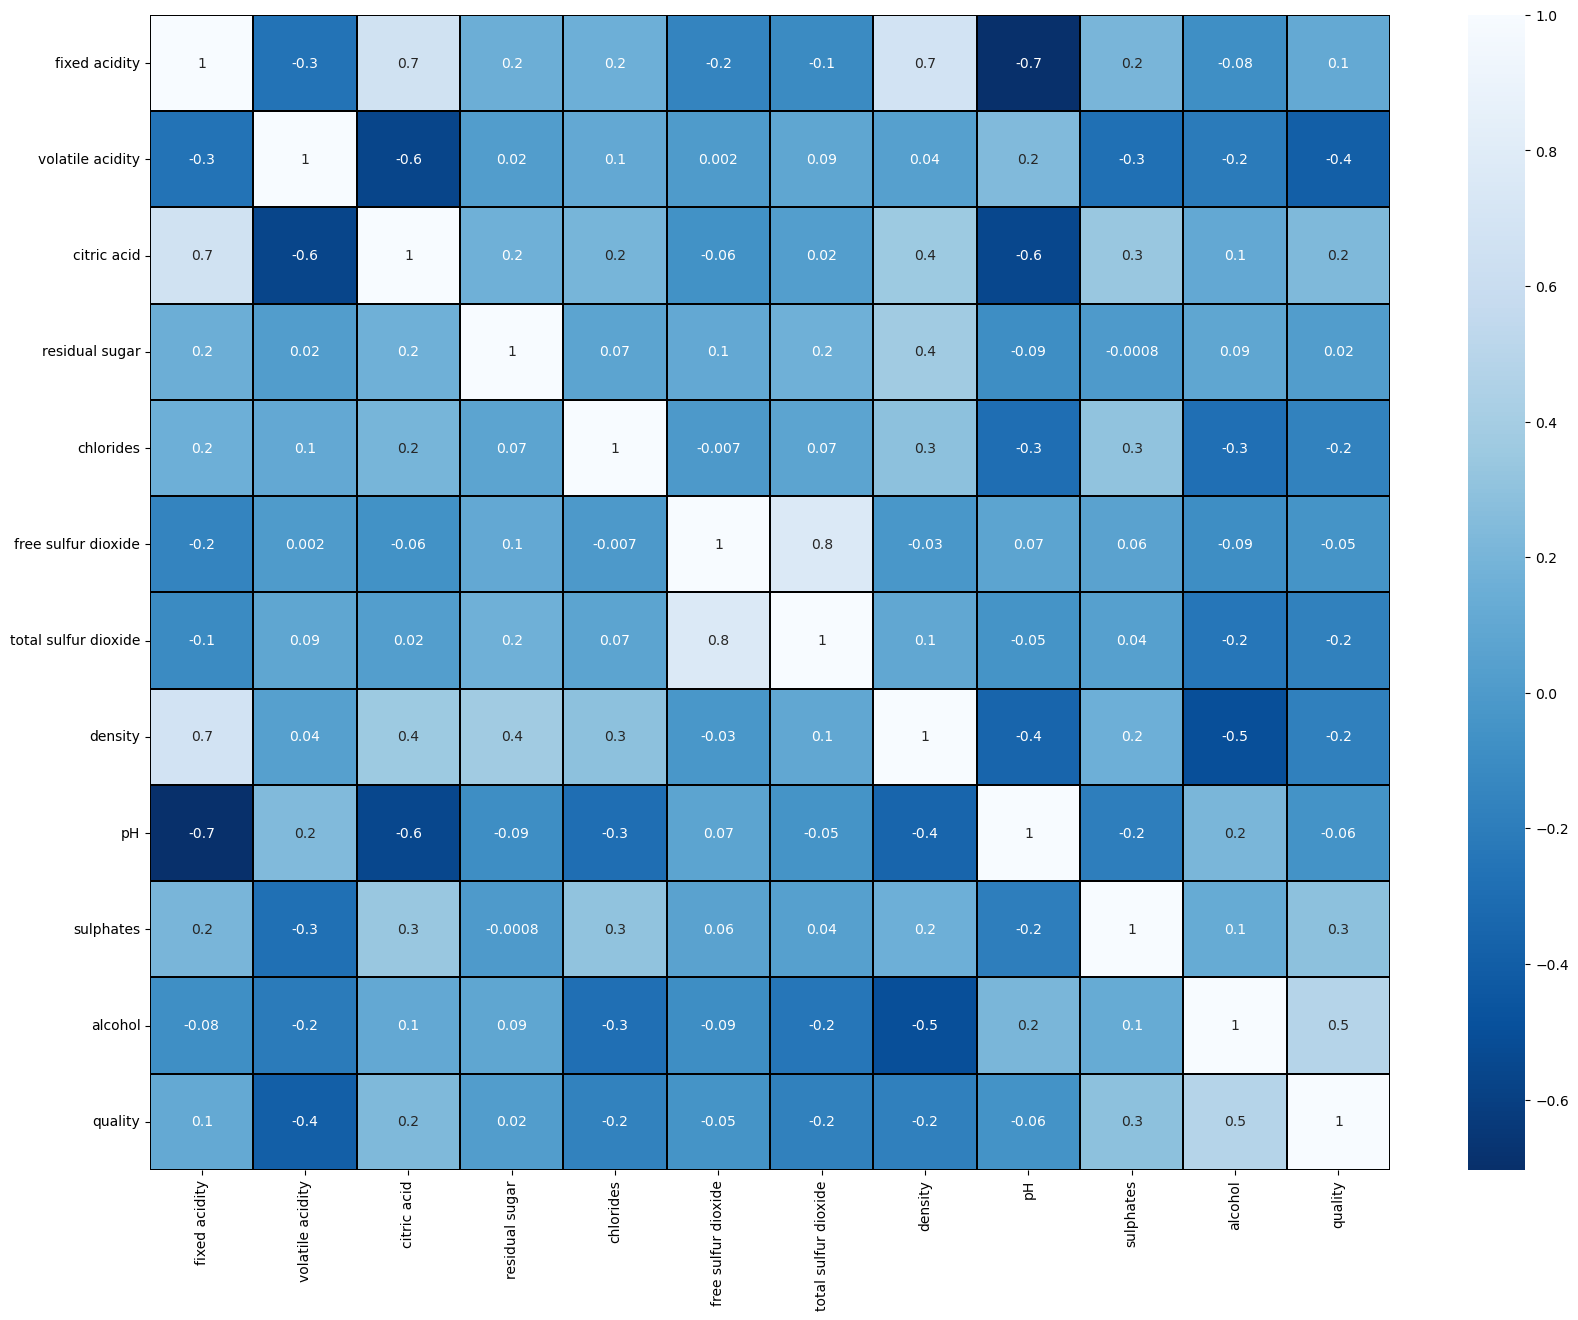

In [199]:
# visualize the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

free sulfur dioxide:This feature has a weak negative correlation with quality. 

In [200]:
# checking correlation of every feature with target variable
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.481308
sulphates               0.291668
citric acid             0.228057
fixed acidity           0.112390
residual sugar          0.019372
free sulfur dioxide    -0.049072
pH                     -0.055166
chlorides              -0.165767
total sulfur dioxide   -0.174637
density                -0.184413
volatile acidity       -0.396736
Name: quality, dtype: float64

# Seperating features and label

In [201]:
x = df.drop('quality',axis=1)
y = df['quality']

# feature scaling using Standard Scalarization

In [202]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.496772          0.962539    -1.393258       -0.559955  -0.243443   
1         -0.243280          1.718416    -1.393258        0.220402   0.429481   
2         -0.243280          1.227564    -1.188617       -0.094371   0.256892   
3          1.624513         -1.547286     1.471711       -0.559955  -0.276963   
4         -0.496772          0.777326    -1.393258       -0.686418  -0.276963   
...             ...               ...          ...             ...        ...   
1354      -0.894738          0.584471    -0.983977       -0.559955  -0.520379   
1355      -1.316859          0.484919    -0.983977       -0.437855   0.197699   
1356      -1.538198          0.225964    -0.881656       -0.205358  -0.742698   
1357      -1.538198          0.705943    -0.779336       -0.437855  -0.276963   
1358      -1.463602         -1.304814     1.011270        1.121056  -0.556497   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.325749             -0.222742  0.584430  1.284477   
1                0.982305              0.797757  0.049362 -0.702044   
2                0.126873              0.447898  0.156404 -0.307849   
3                0.323201              0.615641  0.691400 -0.967586   
4               -0.087781              0.001164  0.584430  1.284477   
...                   ...                   ...       ...       ...   
1354             1.192650             -0.070818 -0.105875  0.720223   
1355             1.450908              0.138230 -0.968254  0.909396   
1356             1.855279              0.359332 -0.850359  1.346575   
1357             1.450908              0.138230 -0.662834  1.655309   
1358             0.415619              0.070786 -0.652119  0.529940   

      sulphates   alcohol  
0     -0.602004 -0.977375  
1      0.217977 -0.577090  
2      0.022659 -0.577090  
3     -0.457704 -0.577090  
4     -0.602004 -0.977375  
...         ...       ...  
1354   1.060505 -0.876255  
1355  -0.457704  0.097965  
1356   0.712186  0.743646  
1357   0.407631 -0.187553  
1358   0.088420  0.561978  

[1359 rows x 11 columns]

# Checking Variance Inflation Factor(VIF)

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF Values              Features
0     8.335732         fixed acidity
1     1.871324      volatile acidity
2     3.104956           citric acid
3     1.835416        residual sugar
4     1.477296             chlorides
5     2.610050   free sulfur dioxide
6     2.934672  total sulfur dioxide
7     7.222681               density
8     3.619774                    pH
9     1.445484             sulphates
10    3.352971               alcohol

To check multi colinearity we use VIF
Drop column which has higher vif value
In above values we can see the highest vif value column is 'fixed acidity'

In [204]:
x.drop('fixed acidity',axis = 1, inplace=True)

In [205]:
vif = pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF Values              Features
0    1.871010      volatile acidity
1    2.824204           citric acid
2    1.462224        residual sugar
3    1.403939             chlorides
4    2.567555   free sulfur dioxide
5    2.785513  total sulfur dioxide
6    2.529029               density
7    1.649929                    pH
8    1.389244             sulphates
9    2.314817               alcohol

Now we can see there is multicoliniarity not exist.

In [207]:
y.value_counts()
# target feature value counts

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

Here we can see that data is not balanced.
here we will use oversampling method make data balanced.

In [208]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)


In [209]:
# Before sampling
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [210]:
y1.value_counts()
# Balanced values

5    577
6    577
7    577
4    577
8    577
3    577
Name: quality, dtype: int64

# Modling

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [212]:
accu = 0 #Accuracy
rs = 0 #Random State
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state = i)
    lr =  RandomForestClassifier()
    lr.fit(x_train,y_train) #Train data
    pred = lr.predict(x_test)
    ac = accuracy_score(y_test,pred)
    if ac>accu:
        accu = ac
        rs = i
print('best accuracy is:',accu,'at random state:' ,rs)

best accuracy is: 0.8744588744588745 at random state: 153


# Classification Algorithm

In [213]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve

from sklearn.model_selection import cross_val_score

In [214]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8210678210678211
[[116   0   3   0   0   0]
 [  1  98   3   2   0   0]
 [  3   7  67  22   0   0]
 [  0   7  33  63  21   4]
 [  0   0   0  11 101   7]
 [  0   0   0   0   0 124]]
              precision    recall  f1-score   support

           3       0.97      0.97      0.97       119
           4       0.88      0.94      0.91       104
           5       0.63      0.68      0.65        99
           6       0.64      0.49      0.56       128
           7       0.83      0.85      0.84       119
           8       0.92      1.00      0.96       124

    accuracy                           0.82       693
   macro avg       0.81      0.82      0.81       693
weighted avg       0.81      0.82      0.81       693



In [215]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5800865800865801
[[109   6   0   4   0   0]
 [ 17  52  20  13   2   0]
 [ 12  16  53  15   1   2]
 [  1  14  31  39  32  11]
 [  2   5   3  29  57  23]
 [  0   0   0   0  32  92]]
              precision    recall  f1-score   support

           3       0.77      0.92      0.84       119
           4       0.56      0.50      0.53       104
           5       0.50      0.54      0.51        99
           6       0.39      0.30      0.34       128
           7       0.46      0.48      0.47       119
           8       0.72      0.74      0.73       124

    accuracy                           0.58       693
   macro avg       0.57      0.58      0.57       693
weighted avg       0.57      0.58      0.57       693



In [216]:
sv =SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7647907647907648
[[119   0   0   0   0   0]
 [  5  87   9   3   0   0]
 [  4  13  61  19   2   0]
 [  2  10  28  56  25   7]
 [  1   0   4  23  84   7]
 [  0   0   0   0   1 123]]
              precision    recall  f1-score   support

           3       0.91      1.00      0.95       119
           4       0.79      0.84      0.81       104
           5       0.60      0.62      0.61        99
           6       0.55      0.44      0.49       128
           7       0.75      0.71      0.73       119
           8       0.90      0.99      0.94       124

    accuracy                           0.76       693
   macro avg       0.75      0.76      0.76       693
weighted avg       0.75      0.76      0.76       693



In [217]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = gr.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.7546897546897547
[[117   0   2   0   0   0]
 [  2  88  11   3   0   0]
 [  2   9  60  27   1   0]
 [  2   7  36  50  28   5]
 [  0   1   3  20  86   9]
 [  0   0   0   0   2 122]]
              precision    recall  f1-score   support

           3       0.95      0.98      0.97       119
           4       0.84      0.85      0.84       104
           5       0.54      0.61      0.57        99
           6       0.50      0.39      0.44       128
           7       0.74      0.72      0.73       119
           8       0.90      0.98      0.94       124

    accuracy                           0.75       693
   macro avg       0.74      0.76      0.75       693
weighted avg       0.74      0.75      0.75       693



In [218]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
predbg = bg.predict(x_test)
print(accuracy_score(y_test,predbg))
print(confusion_matrix(y_test,predbg))
print(classification_report(y_test,predbg))

0.7893217893217893
[[117   0   2   0   0   0]
 [  1  96   5   2   0   0]
 [  2  11  64  18   4   0]
 [  1   8  41  52  21   5]
 [  0   0   4  12  96   7]
 [  0   0   0   0   2 122]]
              precision    recall  f1-score   support

           3       0.97      0.98      0.97       119
           4       0.83      0.92      0.88       104
           5       0.55      0.65      0.60        99
           6       0.62      0.41      0.49       128
           7       0.78      0.81      0.79       119
           8       0.91      0.98      0.95       124

    accuracy                           0.79       693
   macro avg       0.78      0.79      0.78       693
weighted avg       0.78      0.79      0.78       693



In [219]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

0.8556998556998557
[[118   0   1   0   0   0]
 [  1  98   4   1   0   0]
 [  2   2  77  18   0   0]
 [  0   5  30  70  19   4]
 [  0   0   1   8 106   4]
 [  0   0   0   0   0 124]]
              precision    recall  f1-score   support

           3       0.98      0.99      0.98       119
           4       0.93      0.94      0.94       104
           5       0.68      0.78      0.73        99
           6       0.72      0.55      0.62       128
           7       0.85      0.89      0.87       119
           8       0.94      1.00      0.97       124

    accuracy                           0.86       693
   macro avg       0.85      0.86      0.85       693
weighted avg       0.85      0.86      0.85       693



# Cross alidation Score

In [220]:
# Resampling methods to check the performance of model
from sklearn.model_selection import cross_val_score

In [221]:
# checking score for random forest classifier
score = cross_val_score(rf,x,y)
print(score)
print(score.mean())
print('difference between scuracy score and cross validation score:',accuracy_score(y_test,predrf)-score.mean())

[0.52573529 0.55514706 0.60294118 0.5625     0.58671587]
0.5666078793140873
difference between scuracy score and cross validation score: 0.25445994175373376


In [222]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between scuracy score and cross validation score:',accuracy_score(y_test,predlr)-score.mean())

[0.54044118 0.53308824 0.62132353 0.57720588 0.6199262 ]
0.5783970045582809
difference between scuracy score and cross validation score: 0.001689575528299181


In [223]:
score = cross_val_score(gr,x,y)
print(score)
print(score.mean())
print('difference between scuracy score and cross validation score:',accuracy_score(y_test,predgr)-score.mean())

[0.54044118 0.52941176 0.55514706 0.55147059 0.52767528]
0.5408291729976125
difference between scuracy score and cross validation score: 0.21386058169214228


In [224]:
score = cross_val_score(bg,x,y)
print(score)
print(score.mean())
print('difference between scuracy score and cross validation score:',accuracy_score(y_test,predbg)-score.mean())

[0.50735294 0.52941176 0.55147059 0.55514706 0.53136531]
0.5349495333188626
difference between scuracy score and cross validation score: 0.2543722560029267


In [225]:
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference between scuracy score and cross validation score:',accuracy_score(y_test,predet)-score.mean())

[0.54044118 0.57720588 0.58088235 0.55514706 0.54243542]
0.5592223789884958
difference between scuracy score and cross validation score: 0.29647747671135993


Logistic regression is our best model as the difference between accuracy score and cross validation score is least.

# Hyper Parameter Tuning

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
parameters = {'criterion':['gini','entropy'],
             'random_state':[20,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [228]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)


In [229]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [20, 50, 1000]})

In [230]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 20}

In [231]:
final_model = ExtraTreesClassifier(criterion = 'entropy',max_depth = 20,n_estimators = 200,n_jobs = -2,random_state =50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

84.4155844155844


In [232]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [233]:
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#  print precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

for i in range(len(precision)):
    print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-score = {f1[i]:.2f}")

#  print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Class 0: Precision = 0.97, Recall = 0.98, F1-score = 0.98
Class 1: Precision = 0.92, Recall = 0.96, F1-score = 0.94
Class 2: Precision = 0.62, Recall = 0.76, F1-score = 0.68
Class 3: Precision = 0.72, Recall = 0.47, F1-score = 0.57
Class 4: Precision = 0.85, Recall = 0.92, F1-score = 0.88
Class 5: Precision = 0.93, Recall = 1.00, F1-score = 0.96
Confusion Matrix:
[[117   0   2   0   0   0]
 [  1 100   3   0   0   0]
 [  2   4  75  18   0   0]
 [  0   5  40  60  19   4]
 [  0   0   0   5 109   5]
 [  0   0   0   0   0 124]]


1.The model achieved an accuracy of 0.86,which means that 86% of predictions were correct.

2.Confusion matrix shows tabular representation of actual vs predicted classes for each class.

3.each row represent actual class and each column represent predicted class.

4.the diagonal elements from top-left to bottom-right of confusion matrix represent correct prediction and off-diagonal elements represent the incorrect predictions.